In [14]:
import pandas as pd
from plotnine import *

In [15]:
weather_meta = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/datos-metereologicos-2021-metadatos.csv')
weather_raw = pd.read_csv('C:/Users/carro/OneDrive/Escritorio/CUNEF/Visualización/datos-metereologicos-2021.csv')

In [16]:
weather = (weather_raw
           .assign(**{'fecha': lambda df: pd.to_datetime(df['fecha'])})
           .assign(**{'mes': lambda df: df['fecha'].dt.month})
           .assign(**{'tmed': lambda df: df['tmed'].str.replace(',', '.').astype(float)})
           .assign(**{'tmax': lambda df: df['tmax'].str.replace(',', '.').astype(float)})
           .assign(**{'tmin': lambda df: df['tmin'].str.replace(',', '.').astype(float)})
           .assign(
                prec=lambda d: pd.to_numeric(
                d['prec'].astype(str).str.replace(',', '.', regex=False),
                errors='coerce'
            ).fillna(0.0))
           )

¿Qué proporción de los días registrados son fríos, templados y calurosos según la temperatura media?

C:\Users\carro\AppData\Local\Temp\ipykernel_5220\3558300088.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


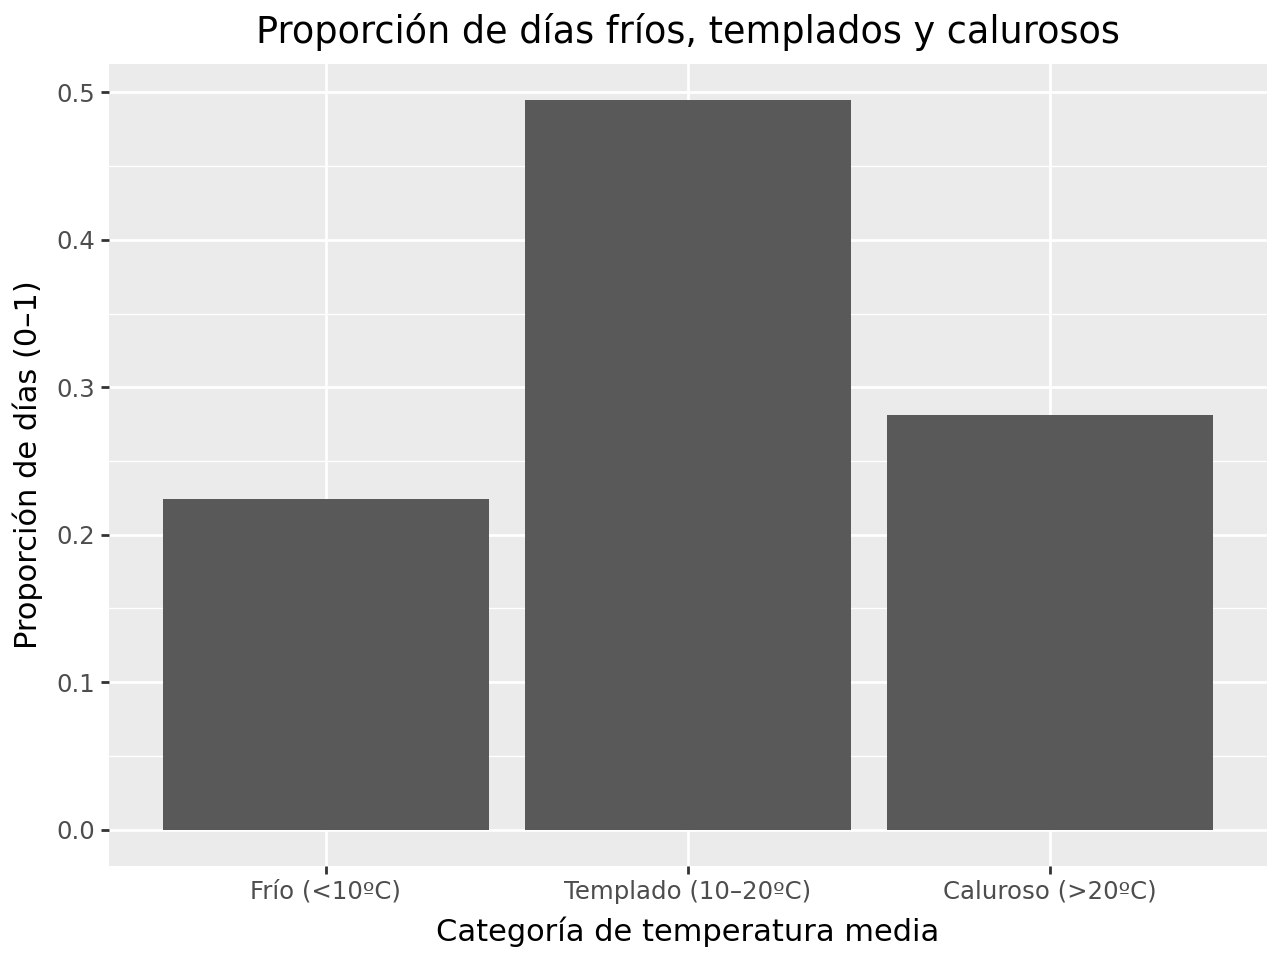

In [17]:
# Categorías de temperatura
weather_temp = weather.assign(
    cat_temp=pd.cut(
        weather['tmed'],
        bins=[-50, 10, 20, 60],
        labels=['Frío (<10ºC)', 'Templado (10–20ºC)', 'Caluroso (>20ºC)']
    )
)

# Proporciones
temp_props = (
    weather_temp
    .groupby('cat_temp')
    .size()
    .reset_index(name='n')
)
temp_props['prop'] = temp_props['n'] / temp_props['n'].sum()

(
    ggplot(temp_props, aes(x='cat_temp', y='prop')) +
    geom_col() +
    labs(
        title='Proporción de días fríos, templados y calurosos',
        x='Categoría de temperatura media',
        y='Proporción de días (0–1)'
    )
)

¿Qué proporción de días fríos tiene cada provincia respecto al total de días observados en esa provincia?

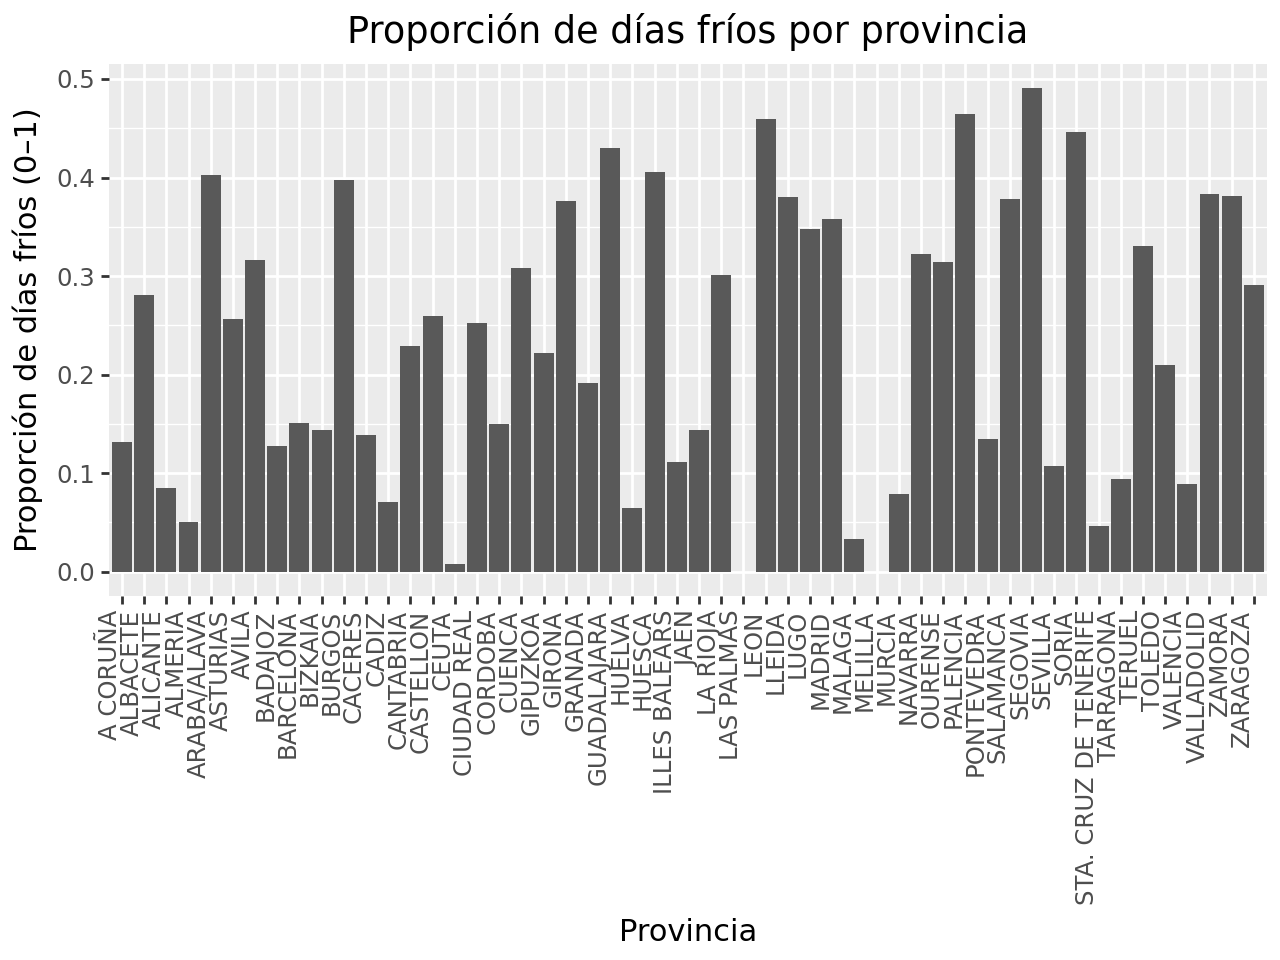

In [18]:
# Indicador de día frío
weather_cold = weather.assign(
    frio=lambda df: df['tmed'] < 10
)

# Proporción de días fríos por provincia
cold_by_prov = (
    weather_cold
    .groupby('provincia')
    .agg(prop_frio=('frio', 'mean'))
    .reset_index()
)

(
    ggplot(cold_by_prov, aes(x='provincia', y='prop_frio')) +
    geom_col() +
    labs(
        title='Proporción de días fríos por provincia',
        x='Provincia',
        y='Proporción de días fríos (0–1)'
    ) +
    theme(axis_text_x=element_text(rotation=90, ha='right'))
)